In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

C:\Users\bpeddi\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\bpeddi\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\bpeddi\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = pd.read_csv('horse.csv')
df = pd.DataFrame(data)

In [3]:
df.isna().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [4]:
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import Imputer

# #Method1
# imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# imp.fit_transform(df)

# #Method2
# imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
# imp.fit(df)

# #Method3
# imp_mean = SimpleImputer( strategy='most_frequent')
# imp_mean.fit(df)

In [5]:
l=LabelEncoder()
df = df.apply(l.fit_transform)

In [6]:
# Missing values ae handled and also labels are encoded.
df.head(7)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,125,23,17,16,1,3,3,2,...,21,36,1,6,0,0,55,0,0,0
1,1,0,214,30,28,9,1,2,4,1,...,26,77,1,6,1,0,13,0,0,0
2,0,0,140,21,3,13,2,2,5,1,...,8,19,1,6,2,0,0,0,0,1
3,1,1,264,29,50,36,0,2,2,2,...,24,24,2,29,0,1,13,0,0,1
4,0,0,133,11,34,20,1,2,2,2,...,48,26,1,6,0,0,36,0,0,0
5,0,0,44,18,8,9,3,2,5,1,...,26,17,1,6,2,0,0,0,0,0
6,1,0,6,17,8,7,2,2,3,1,...,12,22,1,6,2,1,23,0,0,0


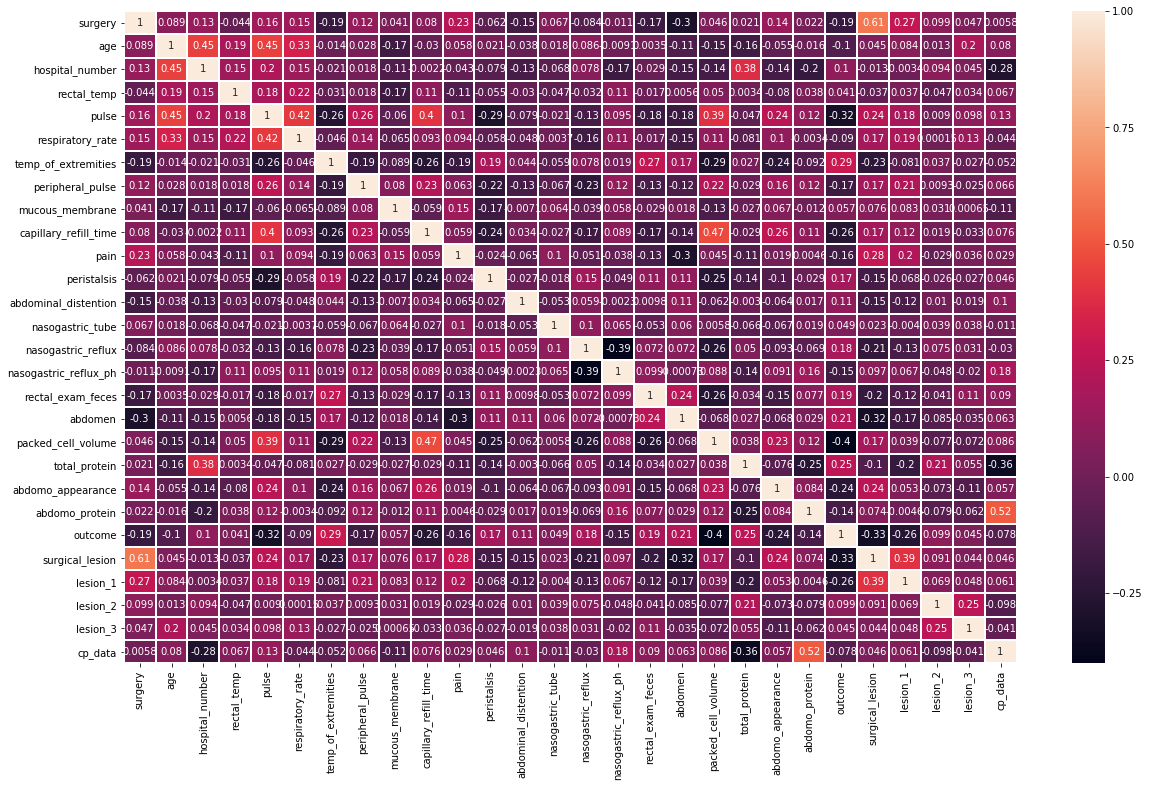

In [11]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(),annot=True, linewidth=1)

In [12]:
features = ['surgery','age','hospital_number','rectal_temp','pulse','respiratory_rate','temp_of_extremities',
'peripheral_pulse','mucous_membrane','capillary_refill_time','pain','peristalsis','abdominal_distention',
'nasogastric_tube','nasogastric_reflux','nasogastric_reflux_ph','rectal_exam_feces','abdomen','packed_cell_volume',
'total_protein','abdomo_appearance','abdomo_protein','surgical_lesion','lesion_1','lesion_2','lesion_3','cp_data']

label=['outcome']
X=df[features]
Y=df[label]
seed=7777
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=seed)

In [27]:
# Decision Tree Classifier

dt=DecisionTreeClassifier(max_depth=5, random_state=seed)
model=dt.fit(X_train,Y_train)
predvalue=model.predict(X_test)
accuracyscore = accuracy_score(Y_test,predvalue)
print("Decision Tree Accuracy score = ",accuracyscore)

Decision Tree Accuracy score =  0.6333333333333333


In [28]:
# Random Forest Classifier

rf=RandomForestClassifier(n_estimators=10, max_depth=5, random_state=seed)
model=rf.fit(X_train,Y_train)
predvalue=model.predict(X_test)
accuracyscore = accuracy_score(Y_test,predvalue)
print("Random Forest Accuracy score = ",accuracyscore)

Random Forest Accuracy score =  0.65


C:\Users\bpeddi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
